In [106]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from seaborn import heatmap

pd.options.display.max_columns = None

In [107]:
df_train = pd.read_csv('../processed/x_train_04_output.csv')
df_test = pd.read_csv('../processed/x_test_04_output.csv')

y_train = pd.read_csv('../processed/y_train.csv')
y_test = pd.read_csv('../processed/y_test.csv')

In [108]:
df_train.head(1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_proc,earliest_cr_line_months,term_int,issue_d_date,mths_since_issue_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,home_ownership_OTHER_NONE_ANY_RENT,addr_state_ND,addr_state_ND_NE_IA_NV_FL_HI_AL,addr_state_NM_VA,addr_state_OK_TN_MO_LA_MD_NC,addr_state_UT_KY_AZ_NJ,addr_state_AR_MI_PA_OH_MN,addr_state_RI_MA_DE_SD_IN,addr_state_GA_WA_OR,addr_state_WI_MT,addr_state_IL_CT,addr_state_KS_SC_CO_VT_AK_MS,addr_state_WV_NH_WY_DC_ME_ID,purpose_educational_renewable_energy_other_house,purpose_medical_wedding_vacation,purpose_major_purchase_car_home_improvement,term_int_36,term_int_60,emp_length_int_0,emp_length_int_1,emp_length_int_2_4,emp_length_int_5_6,emp_length_int_7_9,emp_length_int_10,mths_since_issue_d_27,mths_since_issue_d_27_29,mths_since_issue_d_29_30,mths_since_issue_d_30_39,mths_since_issue_d_39_45,mths_since_issue_d_45_56,mths_since_issue_d_56_84,mths_since_issue_d_84,int_rate_9.548,int_rate_9.548-12.025,int_rate_12.025-15.74,int_rate_15.74-20.281,int_rate_>20.281,delinq_2yrs:0,delinq_2yrs

In [109]:
df_train = df_train.loc[: , ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_OTHER_NONE_ANY_RENT',
'home_ownership_OWN',
'home_ownership_MORTGAGE',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'addr_state_NM_VA',
'addr_state_NY',
'addr_state_OK_TN_MO_LA_MD_NC',
'addr_state_CA',
'addr_state_UT_KY_AZ_NJ',
'addr_state_AR_MI_PA_OH_MN',
'addr_state_RI_MA_DE_SD_IN',
'addr_state_GA_WA_OR',
'addr_state_WI_MT',
'addr_state_TX',
'addr_state_IL_CT',
'addr_state_KS_SC_CO_VT_AK_MS',
'addr_state_WV_NH_WY_DC_ME_ID',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_educational_renewable_energy_other_house',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_major_purchase_car_home_improvement',
'purpose_medical_wedding_vacation',
'initial_list_status_f',
'initial_list_status_w',
'term_int_36',
'term_int_60',
'emp_length_int_0',
'emp_length_int_1',
'emp_length_int_2_4',
'emp_length_int_5_6',
'emp_length_int_7_9',
'emp_length_int_10',
'mths_since_issue_d_27',
'mths_since_issue_d_27_29',
'mths_since_issue_d_29_30',
'mths_since_issue_d_30_39',
'mths_since_issue_d_39_45',
'mths_since_issue_d_45_56',
'mths_since_issue_d_56_84',
'mths_since_issue_d_84',
'int_rate_9.548',
'int_rate_9.548-12.025',
'int_rate_12.025-15.74',
'int_rate_15.74-20.281',
'int_rate_>20.281',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [110]:
ref_categories = ['grade_G',
'home_ownership_OTHER_NONE_ANY_RENT',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'verification_status_Verified',
'purpose_educational_renewable_energy_other_house',
'initial_list_status_f',
'term_int_60',
'emp_length_int_0',
'mths_since_issue_d_84',
'int_rate_>20.281',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [111]:
df_train = df_train.drop(ref_categories, axis = 1)
df_train.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,home_ownership_OWN,home_ownership_MORTGAGE,addr_state_NM_VA,addr_state_NY,addr_state_OK_TN_MO_LA_MD_NC,addr_state_CA,addr_state_UT_KY_AZ_NJ,addr_state_AR_MI_PA_OH_MN,addr_state_RI_MA_DE_SD_IN,addr_state_GA_WA_OR,addr_state_WI_MT,addr_state_TX,addr_state_IL_CT,addr_state_KS_SC_CO_VT_AK_MS,addr_state_WV_NH_WY_DC_ME_ID,verification_status_Not Verified,verification_status_Source Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase_car_home_improvement,purpose_medical_wedding_vacation,initial_list_status_w,term_int_36,emp_length_int_1,emp_length_int_2_4,emp_length_int_5_6,emp_length_int_7_9,emp_length_int_10,mths_since_issue_d_27,mths_since_issue_d_27_29,mths_since_issue_d_29_30,mths_since_issue_d_30_39,mths_since_issue_d_39_45,mths_since_issue_d_45_56,mths_since_issue_d_56_84,int_rate_9.548,int_rate_9.548-12.025,int_rate_12.025-15.74,int_rate_15.74-20.281,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:3-4,pub_rec:>=5,total_acc:28-51,total_acc:>=52,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


In [112]:
reg = LogisticRegression()

In [113]:
reg.fit(df_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
reg.intercept_

array([1.39638309])

In [115]:
reg.coef_

array([[ 8.95075804e-01,  7.64387899e-01,  5.82200106e-01,
         4.31353190e-01,  2.97025135e-01,  1.12622164e-01,
         9.00259346e-02,  9.78106034e-02,  2.01066168e-02,
         5.97168516e-02,  5.40985371e-02,  3.43487458e-02,
         5.68805891e-02,  1.24114732e-01,  8.54787451e-02,
         1.58866525e-01,  2.41190931e-01,  2.20206860e-01,
         2.50469486e-01,  3.10948321e-01,  4.91893733e-01,
         1.12230283e-01,  1.02199179e-04,  2.35063827e-01,
         1.17258515e-01,  1.84839612e-01,  2.05746904e-01,
         7.49513717e-02,  6.78878234e-02,  8.54946187e-02,
         1.10919875e-01,  8.50893916e-02,  6.02879316e-02,
         1.35071914e-01,  1.01771040e+00,  7.37644534e-01,
         6.31383850e-01,  3.88202770e-01,  8.41584398e-02,
        -2.07064521e-01, -2.98657262e-01,  1.09073143e+00,
         6.58104097e-01,  4.26376192e-01,  1.74093819e-01,
         7.82797182e-02,  4.91248803e-02, -1.19022721e+00,
        -1.33711246e+00, -1.47580846e+00,  3.33421084e-0

In [116]:
feature_name = df_train.columns.values

In [117]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.396383
1,grade_A,0.895076
2,grade_B,0.764388
3,grade_C,0.582200
4,grade_D,0.431353
...,...,...
95,mths_since_last_record:3-20,-0.315156
96,mths_since_last_record:21-31,-0.408149
97,mths_since_last_record:32-80,-0.223749
98,mths_since_last_record:81-86,-0.401719


In [119]:
df_test.head(1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_proc,earliest_cr_line_months,term_int,issue_d_date,mths_since_issue_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,home_ownership_OTHER_NONE_ANY_RENT,addr_state_ND,addr_state_ND_NE_IA_NV_FL_HI_AL,addr_state_NM_VA,addr_state_OK_TN_MO_LA_MD_NC,addr_state_UT_KY_AZ_NJ,addr_state_AR_MI_PA_OH_MN,addr_state_RI_MA_DE_SD_IN,addr_state_GA_WA_OR,addr_state_WI_MT,addr_state_IL_CT,addr_state_KS_SC_CO_VT_AK_MS,addr_state_WV_NH_WY_DC_ME_ID,purpose_educational_renewable_energy_other_house,purpose_medical_wedding_vacation,purpose_major_purchase_car_home_improvement,term_int_36,term_int_60,emp_length_int_0,emp_length_int_1,emp_length_int_2_4,emp_length_int_5_6,emp_length_int_7_9,emp_length_int_10,mths_since_issue_d_27,mths_since_issue_d_27_29,mths_since_issue_d_29_30,mths_since_issue_d_30_39,mths_since_issue_d_39_45,mths_since_issue_d_45_56,mths_since_issue_d_56_84,mths_since_issue_d_84,int_rate_9.548,int_rate_9.548-12.025,int_rate_12.025-15.74,int_rate_15.74-20.281,int_rate_>20.281,delinq_2yrs:0,delinq_2yrs

In [120]:
y_pred_1 = reg.predict_proba(df_test.loc[:,['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_OTHER_NONE_ANY_RENT',
'home_ownership_OWN',
'home_ownership_MORTGAGE',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'addr_state_NM_VA',
'addr_state_NY',
'addr_state_OK_TN_MO_LA_MD_NC',
'addr_state_CA',
'addr_state_UT_KY_AZ_NJ',
'addr_state_AR_MI_PA_OH_MN',
'addr_state_RI_MA_DE_SD_IN',
'addr_state_GA_WA_OR',
'addr_state_WI_MT',
'addr_state_TX',
'addr_state_IL_CT',
'addr_state_KS_SC_CO_VT_AK_MS',
'addr_state_WV_NH_WY_DC_ME_ID',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_educational_renewable_energy_other_house',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_major_purchase_car_home_improvement',
'purpose_medical_wedding_vacation',
'initial_list_status_f',
'initial_list_status_w',
'term_int_36',
'term_int_60',
'emp_length_int_0',
'emp_length_int_1',
'emp_length_int_2_4',
'emp_length_int_5_6',
'emp_length_int_7_9',
'emp_length_int_10',
'mths_since_issue_d_27',
'mths_since_issue_d_27_29',
'mths_since_issue_d_29_30',
'mths_since_issue_d_30_39',
'mths_since_issue_d_39_45',
'mths_since_issue_d_45_56',
'mths_since_issue_d_56_84',
'mths_since_issue_d_84',
'int_rate_9.548',
'int_rate_9.548-12.025',
'int_rate_12.025-15.74',
'int_rate_15.74-20.281',
'int_rate_>20.281',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']].drop(ref_categories, axis = 1))

In [124]:
df_test.head(1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_proc,earliest_cr_line_months,term_int,issue_d_date,mths_since_issue_d,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,home_ownership_OTHER_NONE_ANY_RENT,addr_state_ND,addr_state_ND_NE_IA_NV_FL_HI_AL,addr_state_NM_VA,addr_state_OK_TN_MO_LA_MD_NC,addr_state_UT_KY_AZ_NJ,addr_state_AR_MI_PA_OH_MN,addr_state_RI_MA_DE_SD_IN,addr_state_GA_WA_OR,addr_state_WI_MT,addr_state_IL_CT,addr_state_KS_SC_CO_VT_AK_MS,addr_state_WV_NH_WY_DC_ME_ID,purpose_educational_renewable_energy_other_house,purpose_medical_wedding_vacation,purpose_major_purchase_car_home_improvement,term_int_36,term_int_60,emp_length_int_0,emp_length_int_1,emp_length_int_2_4,emp_length_int_5_6,emp_length_int_7_9,emp_length_int_10,mths_since_issue_d_27,mths_since_issue_d_27_29,mths_since_issue_d_29_30,mths_since_issue_d_30_39,mths_since_issue_d_39_45,mths_since_issue_d_45_56,mths_since_issue_d_56_84,mths_since_issue_d_84,int_rate_9.548,int_rate_9.548-12.025,int_rate_12.025-15.74,int_rate_15.74-20.281,int_rate_>20.281,delinq_2yrs:0,delinq_2yrs

In [126]:
df_test['pred_1'] = y_pred_1[:][:,1]

# P-Values

In [128]:
from sklearn import linear_model
import scipy.stats as stat
from sklearn.feature_selection import chi2

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

        self.p_values_2 = chi2(X,y)
    
    def predict_proba(self,X):
        return self.model.predict_proba(X)

<AxesSubplot:>

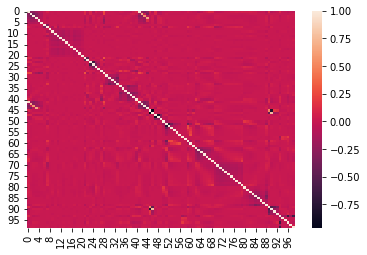

In [129]:
heatmap(df_train.corr().values)

In [130]:
df_train.iloc[:,45:50].head(5)

,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6
0,1,0,0,1,0
1,0,1,0,1,0
2,1,0,0,1,0
3,0,1,0,0,1
4,1,0,0,1,0


In [131]:
reg = LogisticRegression_with_p_values()
reg.fit(df_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg.p_values

In [133]:
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.396383,NaN
1,grade_A,0.895076,9.008141e-19
2,grade_B,0.764388,7.075326e-32
3,grade_C,0.582200,5.324274e-22
4,grade_D,0.431353,6.538032e-14
...,...,...,...
95,mths_since_last_record:3-20,-0.315156,2.574683e-02
96,mths_since_last_record:21-31,-0.408149,1.609684e-03
97,mths_since_last_record:32-80,-0.223749,2.806697e-02
98,mths_since_last_record:81-86,-0.401719,5.563471e-05


In [134]:
df_train = pd.read_csv('../processed/x_train_04_output.csv')
df_train = df_train.loc[: , ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_OTHER_NONE_ANY_RENT',
'home_ownership_OWN',
'home_ownership_MORTGAGE',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'addr_state_NM_VA',
'addr_state_NY',
'addr_state_OK_TN_MO_LA_MD_NC',
'addr_state_CA',
'addr_state_UT_KY_AZ_NJ',
'addr_state_AR_MI_PA_OH_MN',
'addr_state_RI_MA_DE_SD_IN',
'addr_state_GA_WA_OR',
'addr_state_WI_MT',
'addr_state_TX',
'addr_state_IL_CT',
'addr_state_KS_SC_CO_VT_AK_MS',
'addr_state_WV_NH_WY_DC_ME_ID',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_educational_renewable_energy_other_house',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_major_purchase_car_home_improvement',
'purpose_medical_wedding_vacation',
'initial_list_status_f',
'initial_list_status_w',
'term_int_36',
'term_int_60',
'emp_length_int_0',
'emp_length_int_1',
'emp_length_int_2_4',
'emp_length_int_5_6',
'emp_length_int_7_9',
'emp_length_int_10',
'mths_since_issue_d_27',
'mths_since_issue_d_27_29',
'mths_since_issue_d_29_30',
'mths_since_issue_d_30_39',
'mths_since_issue_d_39_45',
'mths_since_issue_d_45_56',
'mths_since_issue_d_56_84',
'mths_since_issue_d_84',
'int_rate_9.548',
'int_rate_9.548-12.025',
'int_rate_12.025-15.74',
'int_rate_15.74-20.281',
'int_rate_>20.281',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [135]:
ref_categories = ['grade_G',
                'home_ownership_OTHER_NONE_ANY_RENT',
                'addr_state_ND_NE_IA_NV_FL_HI_AL',
                'verification_status_Verified',
                'purpose_educational_renewable_energy_other_house',
                'initial_list_status_f',
                'term_int_60',
                'emp_length_int_0',
                'mths_since_issue_d_84',
                'int_rate_>20.281',
                'inq_last_6mths:>6',
                'acc_now_delinq:0',
                'annual_inc:<20K',
                'dti:>35',
                'mths_since_last_delinq:0-3',
                'mths_since_last_record:0-2']

In [136]:
df_train = df_train.drop(ref_categories, axis = 1)
df_train.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,home_ownership_OWN,home_ownership_MORTGAGE,addr_state_NM_VA,addr_state_NY,addr_state_OK_TN_MO_LA_MD_NC,addr_state_CA,addr_state_UT_KY_AZ_NJ,addr_state_AR_MI_PA_OH_MN,addr_state_RI_MA_DE_SD_IN,addr_state_GA_WA_OR,addr_state_WI_MT,addr_state_TX,addr_state_IL_CT,addr_state_KS_SC_CO_VT_AK_MS,addr_state_WV_NH_WY_DC_ME_ID,verification_status_Not Verified,verification_status_Source Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase_car_home_improvement,purpose_medical_wedding_vacation,initial_list_status_w,term_int_36,emp_length_int_1,emp_length_int_2_4,emp_length_int_5_6,emp_length_int_7_9,emp_length_int_10,mths_since_issue_d_27,mths_since_issue_d_27_29,mths_since_issue_d_29_30,mths_since_issue_d_30_39,mths_since_issue_d_39_45,mths_since_issue_d_45_56,mths_since_issue_d_56_84,int_rate_9.548,int_rate_9.548-12.025,int_rate_12.025-15.74,int_rate_15.74-20.281,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

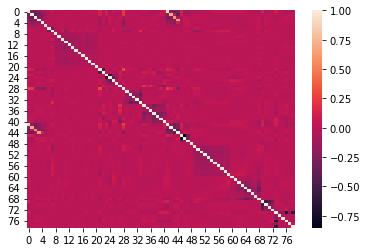

In [137]:
heatmap(df_train.corr().values)

In [138]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(df_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
feature_name = df_train.columns.values

In [140]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.483672
1,grade_A,0.889715
2,grade_B,0.761152
3,grade_C,0.579017
4,grade_D,0.426653
...,...,...
75,mths_since_last_record:3-20,-0.269252
76,mths_since_last_record:21-31,-0.372016
77,mths_since_last_record:32-80,-0.200822
78,mths_since_last_record:81-86,-0.421146


In [141]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.483672,NaN
1,grade_A,0.889715,1.388020e-18
2,grade_B,0.761152,1.163779e-31
3,grade_C,0.579017,8.213902e-22
4,grade_D,0.426653,1.107485e-13
...,...,...,...
75,mths_since_last_record:3-20,-0.269252,4.998124e-02
76,mths_since_last_record:21-31,-0.372016,3.088455e-03
77,mths_since_last_record:32-80,-0.200822,3.917332e-02
78,mths_since_last_record:81-86,-0.421146,1.363884e-05


In [146]:
y_pred_2 = reg2.predict_proba(df_test.loc[: , ['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_OTHER_NONE_ANY_RENT',
'home_ownership_OWN',
'home_ownership_MORTGAGE',
'addr_state_ND_NE_IA_NV_FL_HI_AL',
'addr_state_NM_VA',
'addr_state_NY',
'addr_state_OK_TN_MO_LA_MD_NC',
'addr_state_CA',
'addr_state_UT_KY_AZ_NJ',
'addr_state_AR_MI_PA_OH_MN',
'addr_state_RI_MA_DE_SD_IN',
'addr_state_GA_WA_OR',
'addr_state_WI_MT',
'addr_state_TX',
'addr_state_IL_CT',
'addr_state_KS_SC_CO_VT_AK_MS',
'addr_state_WV_NH_WY_DC_ME_ID',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_educational_renewable_energy_other_house',
'purpose_credit_card',
'purpose_debt_consolidation',
'purpose_major_purchase_car_home_improvement',
'purpose_medical_wedding_vacation',
'initial_list_status_f',
'initial_list_status_w',
'term_int_36',
'term_int_60',
'emp_length_int_0',
'emp_length_int_1',
'emp_length_int_2_4',
'emp_length_int_5_6',
'emp_length_int_7_9',
'emp_length_int_10',
'mths_since_issue_d_27',
'mths_since_issue_d_27_29',
'mths_since_issue_d_29_30',
'mths_since_issue_d_30_39',
'mths_since_issue_d_39_45',
'mths_since_issue_d_45_56',
'mths_since_issue_d_56_84',
'mths_since_issue_d_84',
'int_rate_9.548',
'int_rate_9.548-12.025',
'int_rate_12.025-15.74',
'int_rate_15.74-20.281',
'int_rate_>20.281',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']].drop(ref_categories,axis=1))

In [147]:
df_test['pred_2'] = y_pred_2[:][:,1]

In [148]:
import pickle
pickle.dump(reg2, open('../models/pd_model.sav', 'wb'))

In [150]:
df_test[['pred_1','pred_2']].to_csv('../processed/predictions.csv')